## 02 - Generate CMEMS data cubes 
### A DeepESDL example notebook 

This notebook demonstrates how to access CMEMS data via the dedicated xcube store, which provides dynamic data cube views into each gridded data set. More information on the data sets offered can be found in the [Copernicus Marine Data Store](https://data.marine.copernicus.eu/products). 

Please, also refer to the [DeepESDL documentation](https://deepesdl.readthedocs.io/en/latest/guide/user-guide/) and visit the platform's [website](https://www.earthsystemdatalab.net/) for further information!

Brockmann Consult, 2022

--------------------------------------

In [2]:
# mandatory imports
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store
from IPython.display import JSON

Check whether the `CMEMS` store is among the available stores, if not please follow the installation information from the top of this notebook. 

In [3]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

/home/conda/deepesdl/ad58651ccd12e6a3203ef6d4686862efd6d8b7377046c8ac02f87b8a2f5b9546-20221011-090031-467021-16-cube-gen/lib/python3.9/site-packages/xcube/util/plugin.py:110: UserWarning: loading xcube plugin 'xcube_cds' took 113 ms, consider code optimization!
  warnings.warn(f'loading xcube plugin {entry_point.name!r} took {millis} ms, '


<IPython.core.display.JSON object>

Usually we need more information to get the actual data store object. Which data store parameters are available for `cmems`?

In [4]:
get_data_store_params_schema('cmems')

#### Import the xcube CMEMS store and create store instance

If you do not have cmems user yet, you can register for an [account](https://resources.marine.copernicus.eu/registration-form). For DeepESDL Basic Jupyter Profile default credentials are configured, but due to bandwith limitation by CMEMS they might not be performant when used by several people simultanously. 

In [5]:
# replace with your user name and pwd
#cmemsuser='your-user-name'
#cmemspwd='your-user-password'

In [6]:
#cmems_store = new_data_store('cmems', cmems_user=cmemsuser, cmems_user_password = cmemspwd)
cmems_store = new_data_store('cmems')

#### Get all opendap dataset ids for CMEMS API and let store describe data set

In [7]:
list(cmems_store.get_data_ids())

['cmems_obs-si_ant_physic_my_drift-amsr_P2D',
 'cmems_obs-si_ant_physic_my_drift-amsr_P3D',
 'BAS-ANT-SEAICE_TYPE-L4-NRT-OBS',
 'cmems_mod_arc_bgc_anfc_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_anfc_ecosmo_P1M-m',
 'cmems_mod_arc_bgc_my_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_my_ecosmo_P1M',
 'cmems_mod_arc_bgc_my_ecosmo_P1Y',
 'cmems_obs-oc_arc_bgc-plankton_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-plankton_nrt_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-reflectance_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-reflectance_nrt_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-transp_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-transp_nrt_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-optics_nrt_l3-multi-1km_P1D',
 'cmems_obs-oc_arc_bgc-optics_my_l3-multi-1km_P1M',
 'cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M',
 'cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-reflectance_my_l3-multi-1km_P1M',
 'cmems_obs-oc_arc_bgc-reflectance_my_l3-olci-300m_P1D',
 'cmems_obs-oc_arc_bgc-t

In [8]:
cmems_store.get_data_opener_ids()

('dataset:zarr:cmems',)

In [9]:
data_des = cmems_store.describe_data('dataset-bal-analysis-forecast-wav-hourly')

In [10]:
data_des.time_range

('2018-12-01', '2022-12-27')

In [11]:
data_des.bbox

(9, 53, 30.221627251342774, 65.91610912890626)

#### Open a dataset without cube parameters

In [12]:
ds = cmems_store.open_data('dataset-bal-analysis-forecast-wav-hourly','dataset:zarr:cmems')
ds

<xarray.Dataset>
Dimensions:    (time: 35688, lat: 775, lon: 764)
Coordinates:
  * lat        (lat) float32 53.01 53.02 53.04 53.06 ... 65.86 65.87 65.89 65.91
  * lon        (lon) float32 9.014 9.042 9.069 9.097 ... 30.12 30.15 30.18 30.21
  * time       (time) datetime64[ns] 2018-12-01T01:00:00 ... 2022-12-27
Data variables: (12/17)
    VHM0       (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VHM0_SW1   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VHM0_SW2   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VHM0_WW    (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VMDR       (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VMDR_SW1   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    ...         ...
    VTM01_SW1  (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM01_SW2  (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM01_WW   (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM02      (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTM10      (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
    VTPK       (time, lat, lon) float32 dask.array<chunksize=(4, 481, 474), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.0
    source:                 FMI-WAM_CMEMS
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    title:                  CMEMS WAM model fields (hourly)
    cmems_product_id:       BALTICSEA_ANALYSISFORECAST_WAV_003_010
    westernmost_longitude:  9.0138
    easternmost_longitude:  30.2080
    southernmost_latitude:  53.0083
    northernmost_latitude:  65.9081
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....

In [13]:
ds.VHM0

<xarray.DataArray 'VHM0' (time: 35688, lat: 775, lon: 764)>
dask.array<open_dataset-3fc255efb2d30a9b23adf5b90a4f8fb9VHM0, shape=(35688, 775, 764), dtype=float32, chunksize=(4, 481, 474), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 65.86 65.87 65.89 65.91
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 30.12 30.15 30.18 30.21
  * time     (time) datetime64[ns] 2018-12-01T01:00:00 ... 2022-12-27
Attributes:
    long_name:      Spectral significant wave height (Hm0)
    standard_name:  sea_surface_wave_significant_height
    units:          m
    valid_min:      0.0
    valid_max:      20.0

#### Open dataset with a single variable and time range

In [14]:
ds = cmems_store.open_data('dataset-bal-analysis-forecast-wav-hourly','dataset:zarr:cmems',variable_names=['VHM0'],time_range=('2022-11-01','2022-12-13'))
ds

<xarray.Dataset>
Dimensions:  (time: 1032, lat: 775, lon: 764)
Coordinates:
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 65.86 65.87 65.89 65.91
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 30.12 30.15 30.18 30.21
  * time     (time) datetime64[ns] 2022-11-01 ... 2022-12-13T23:00:00
Data variables:
    VHM0     (time, lat, lon) float32 dask.array<chunksize=(1, 481, 474), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.0
    source:                 FMI-WAM_CMEMS
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    title:                  CMEMS WAM model fields (hourly)
    cmems_product_id:       BALTICSEA_ANALYSISFORECAST_WAV_003_010
    westernmost_longitude:  9.0138
    easternmost_longitude:  30.2080
    southernmost_latitude:  53.0083
    northernmost_latitude:  65.9081
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....

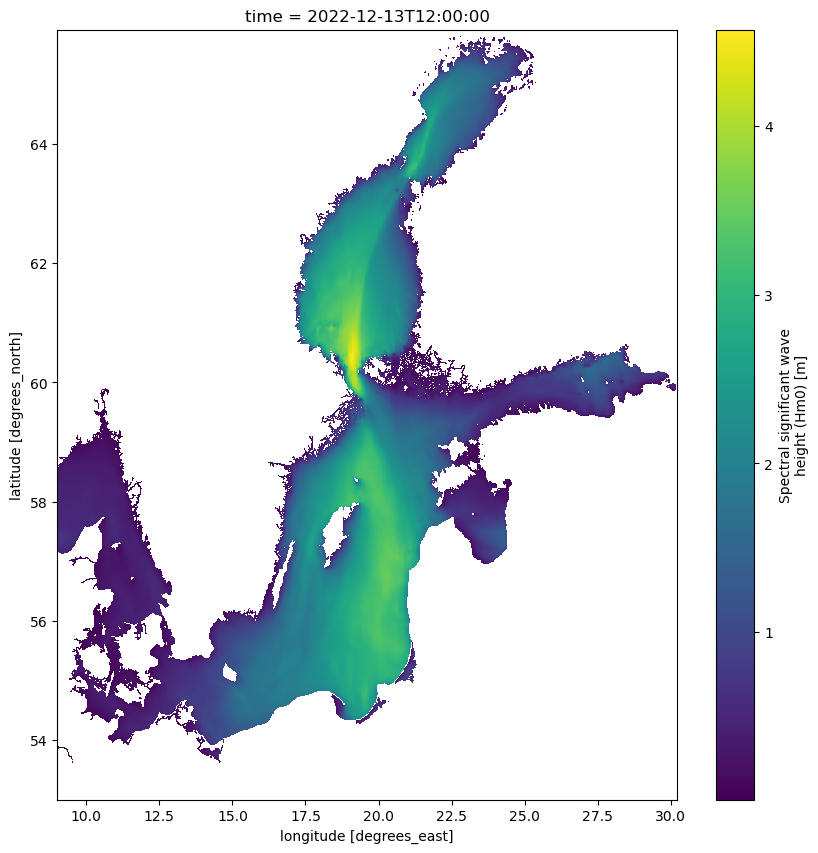

In [15]:
ds.VHM0.sel(time='2022-12-13T12:12.00', method='nearest').plot.imshow(figsize=(10, 10))

#### Open a dataset with cube parameters

In [16]:
cmems_store.get_open_data_params_schema('dataset-bal-analysis-forecast-wav-hourly','dataset:zarr:cmems')

In [17]:
ds = cmems_store.open_data('dataset-bal-analysis-forecast-wav-hourly','dataset:zarr:cmems',variable_names=['VHM0'],time_range=('2022-06-01','2022-06-05'),
                            bbox=[9, 54, 20, 62])
ds

<xarray.Dataset>
Dimensions:  (time: 120, lat: 480, lon: 396)
Coordinates:
  * lat      (lat) float32 54.01 54.02 54.04 54.06 ... 61.94 61.96 61.97 61.99
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 19.9 19.93 19.96 19.99
  * time     (time) datetime64[ns] 2022-06-01 ... 2022-06-05T23:00:00
Data variables:
    VHM0     (time, lat, lon) float32 dask.array<chunksize=(1, 421, 396), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.0
    source:                 FMI-WAM_CMEMS
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    title:                  CMEMS WAM model fields (hourly)
    cmems_product_id:       BALTICSEA_ANALYSISFORECAST_WAV_003_010
    westernmost_longitude:  9.0138
    easternmost_longitude:  30.2080
    southernmost_latitude:  53.0083
    northernmost_latitude:  65.9081
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....

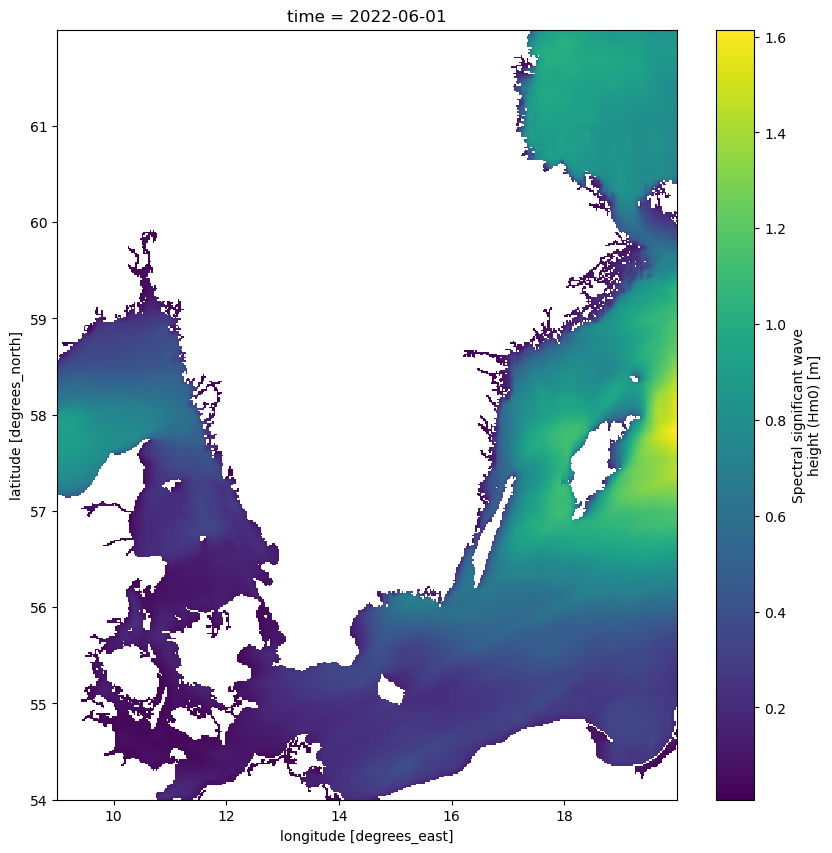

In [18]:
ds.VHM0[0].plot(figsize=(10, 10))

#### Save cube subset locally

In [19]:
# rechunk to image size for efficient storage and access
ds=ds.chunk(time=1, lat=len(ds.lat), lon=len(ds.lon))

In [20]:
ds

<xarray.Dataset>
Dimensions:  (time: 120, lat: 480, lon: 396)
Coordinates:
  * lat      (lat) float32 54.01 54.02 54.04 54.06 ... 61.94 61.96 61.97 61.99
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 19.9 19.93 19.96 19.99
  * time     (time) datetime64[ns] 2022-06-01 ... 2022-06-05T23:00:00
Data variables:
    VHM0     (time, lat, lon) float32 dask.array<chunksize=(1, 480, 396), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.0
    source:                 FMI-WAM_CMEMS
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    title:                  CMEMS WAM model fields (hourly)
    cmems_product_id:       BALTICSEA_ANALYSISFORECAST_WAV_003_010
    westernmost_longitude:  9.0138
    easternmost_longitude:  30.2080
    southernmost_latitude:  53.0083
    northernmost_latitude:  65.9081
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....

In [21]:
# create local store 
import os
path = os.getcwd()
local_store = new_data_store("file", root=path)

In [22]:
# save in levels format to generate data pyramid for efficient visualisation
local_store.write_data(ds,'H_S.levels', replace=True, use_saved_levels=True)

'H_S.levels'

In [23]:
#re-open saved cube, persisted in local storage
ds_levels = local_store.open_data('H_S.levels')

In [24]:
ds = ds_levels.datasets[0]
ds

<xarray.Dataset>
Dimensions:  (time: 120, lat: 480, lon: 396)
Coordinates:
  * lat      (lat) float32 54.01 54.02 54.04 54.06 ... 61.94 61.96 61.97 61.99
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 19.9 19.93 19.96 19.99
  * time     (time) datetime64[ns] 2022-06-01 ... 2022-06-05T23:00:00
Data variables:
    VHM0     (time, lat, lon) float32 dask.array<chunksize=(1, 480, 396), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.0
    cmems_product_id:       BALTICSEA_ANALYSISFORECAST_WAV_003_010
    easternmost_longitude:  30.2080
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    northernmost_latitude:  65.9081
    source:                 FMI-WAM_CMEMS
    southernmost_latitude:  53.0083
    title:                  CMEMS WAM model fields (hourly)
    westernmost_longitude:  9.0138

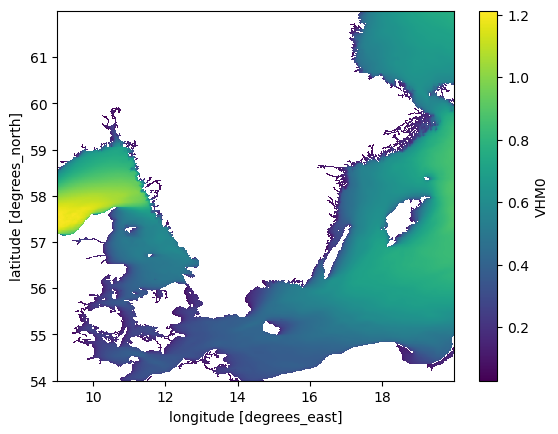

In [25]:
ds.VHM0.mean(dim='time').plot()

In [26]:
# delete created levels data cube
local_store.delete_data('H_S.levels')